In [1]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data/processed_train.csv')
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


In [55]:
data.describe()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
count,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.00000,...,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000,119952.000000
mean,0.494938,0.496322,0.485286,6.820011,0.020216,46776.309465,1.375775,1.025218,0.987253,107.86653,...,0.021409,0.894983,0.104909,0.001942,0.000108,0.104725,0.885337,0.024576,0.002193,0.166833
std,0.067683,0.058596,0.114765,1.095989,0.140740,15194.520319,0.549407,0.180746,0.112180,62.91338,...,0.144743,0.306577,0.306437,0.044031,0.010410,0.306200,0.318616,0.154831,0.046773,0.372829
min,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.493175,0.485433,0.456552,7.000000,0.000000,47238.000000,1.000000,1.000000,1.000000,51.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.493175,0.530941,0.503333,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.552153,0.530941,0.545977,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.666667,1.000000,1.000000,8.000000,1.000000,70486.000000,5.000000,4.000000,1.000000,222.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
data.describe(include='object')

ValueError: No objects to concatenate

Разобьем выборку на тест и трейн

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('HasDetections', axis=1)
y = data['HasDetections']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33)

Обучите LogReg и SVM с помощью классов `LogisticRegression` и `LinearSVC`. Добавьте шаг стандартизации данных в пайплайны. Для разнообразия, возьмем `MinMaxScaler`. Пайплайны запишем в переменные `pipe_lr` и `pipe_svm` соответственно!

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

### Your code is here

pipe_lr = Pipeline([('scaler', MinMaxScaler()),
                    ('lr', LogisticRegression())])

pipe_svm = Pipeline([('scaler', MinMaxScaler()),
                     ('svm', LinearSVC())])

In [5]:
### Обучаем модели на трейне
### Your code is here

pipe_lr.fit(X_train, y_train)
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', LinearSVC())])

In [6]:
print(classification_report(y_test, pipe_lr.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.848     0.988     0.913     19990
           1      0.665     0.114     0.195      4001

    accuracy                          0.843     23991
   macro avg      0.756     0.551     0.554     23991
weighted avg      0.817     0.843     0.793     23991



In [7]:
print(classification_report(y_test, pipe_svm.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.842     0.994     0.912     19990
           1      0.716     0.071     0.130      4001

    accuracy                          0.840     23991
   macro avg      0.779     0.533     0.521     23991
weighted avg      0.821     0.840     0.782     23991



Постройте ROC для обеих моделей, посчитайте AUC . Конечно же, обучение проводите на трейне, а замеры - на тесте.

Заметьте! Классическая реализация `SVM`, как и в лекциях, не дает никакой оценки вероятности. Чтобы трансформировать выходы в вероятности, на практике мы использовали функцию-сигмоиду. Здесь предлагаем Вам трансформировать выходы `decision_function` в вероятности пропорциональным способом.

Например, вы обучили `SVM`, и на тестовых данных модель выдала следующие выходы `decision_function`:

(-10, -5, 0, +2, +10, +15)

Для каждого числа необходимо сделать преобразование в выражение вида `P(y = +1 | x)`.

С одной стороны, отрицательный знак числа будет сигнализировать нам о том, что `P(y = +1 | x) < 0.5`.

Тогда положительный о том, что `P(y = +1 | x) > 0.5`. 

С другой стороны, для тех объектов, в которых модель уверена больше всего, положим краевые вероятности. Для примера выше:

`P(y = +1 | -10) = 0`, `P(y = +1 | +15) = 1`. Для всех промежуточных объектов применим пропорциональное преобразование. Например:

$$
P(y = +1 | -5) = \frac{|-5-(-10)|}{|-10|} \cdot 0.5
$$

$$
P(y = +1 | +2) = \frac{|+2|}{|+15|} \cdot 0.5 + 0.5
$$
Таким образом мы можем перевести выходы SVM в отрезок [0;1] и попробовать интерпретировать новые числа как вероятности, чтобы изобразить калибровочную кривую. При таком преобразовании пропорции внутри первоначально отрицательных и внутри положительных чисел сохраняются.

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc

0.689

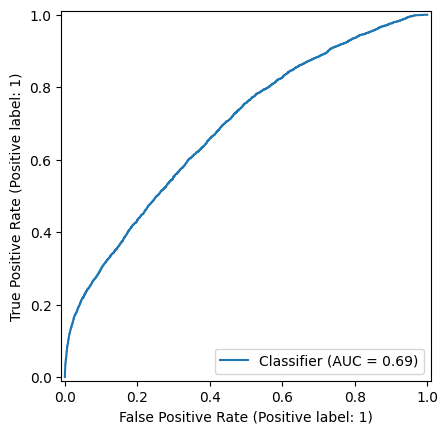

In [9]:
### С изображением рок-кривой для ЛогРега не будет проблем:
### Your code is here

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, pipe_lr.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_predictions(y_test, pipe_lr.predict_proba(X_test)[:, 1])
auc(x=lr_fpr, y=lr_tpr).__round__(3)

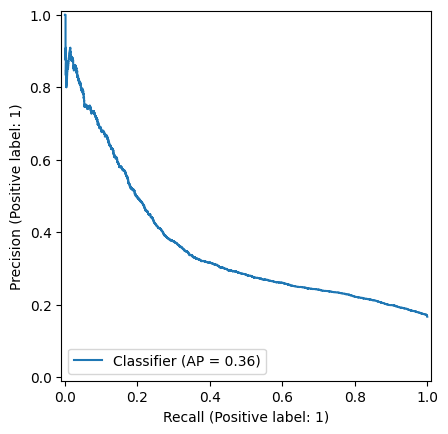

In [10]:
PrecisionRecallDisplay.from_predictions(y_test, pipe_lr.predict_proba(X_test)[:, 1])

In [11]:
### А для того, чтобы построить и изобразить рок-кривую для SVM, придется
### в начале преобразовать выходы pipe_svm.decision_function

### Your code is here

svm_pre_prob = pipe_svm.decision_function(X_test)

min_svm_prob = min(svm_pre_prob)
max_svm_prob = max(svm_pre_prob)

svm_prob = pd.Series(svm_pre_prob).apply(lambda x: abs((x - min_svm_prob) / min_svm_prob) * 0.5 if x < 0 else
abs(x / max_svm_prob) * 0.5 + 0.5).to_numpy()

0.688

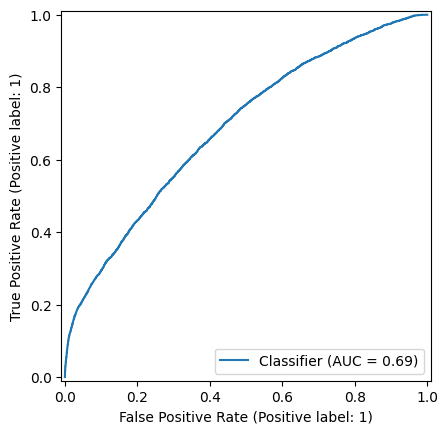

In [12]:
### Your code is here

svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_prob)
RocCurveDisplay.from_predictions(y_test, svm_prob)
auc(x=svm_fpr, y=svm_tpr).__round__(3)

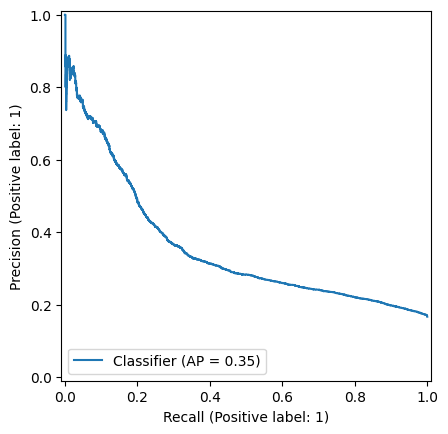

In [13]:
PrecisionRecallDisplay.from_predictions(y_test, svm_prob)

Постройте калибровочные кривые для обеих моделей. Методом from_estimator для svm воспользоваться не получится.

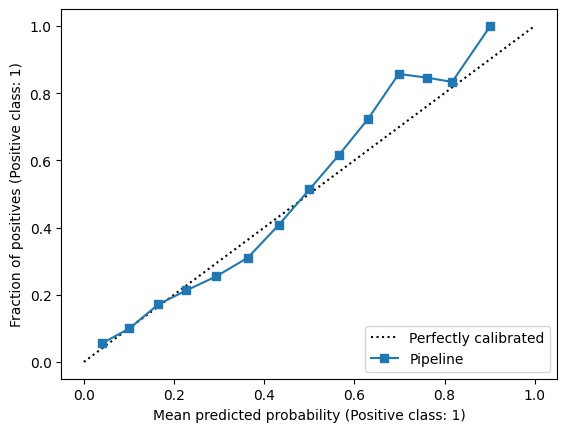

In [26]:
from sklearn.calibration import CalibrationDisplay

### Your code is here

CalibrationDisplay.from_estimator(pipe_lr, X_test, y_test, n_bins=15)

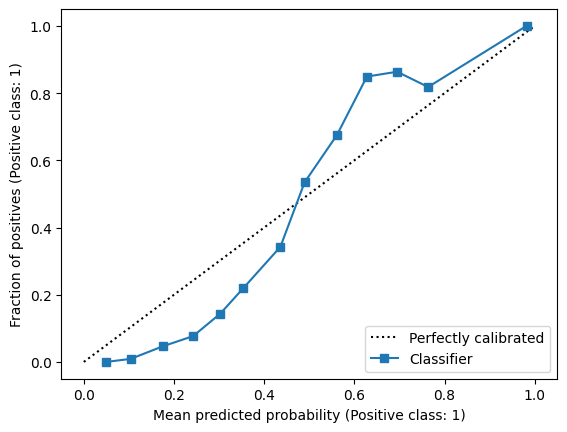

In [25]:
### Your code is here
CalibrationDisplay.from_predictions(y_test, svm_prob, n_bins=15)

**Какая калибровочная кривая ближе к диагонали?  Откалибруйте SVM способом как в практике и изобразите новую кривую!

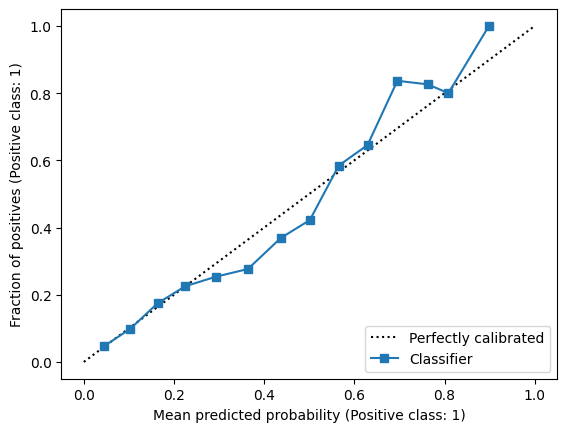

In [27]:
### Калибровка
from sklearn.calibration import CalibratedClassifierCV
### Your code is here

svm_sigmoid_calibration = CalibratedClassifierCV(pipe_svm, cv=5, method='sigmoid')
svm_sigmoid_calibration.fit(X_train, y_train)
CalibrationDisplay.from_predictions(y_test, svm_sigmoid_calibration.predict_proba(X_test)[:,1], n_bins=15)

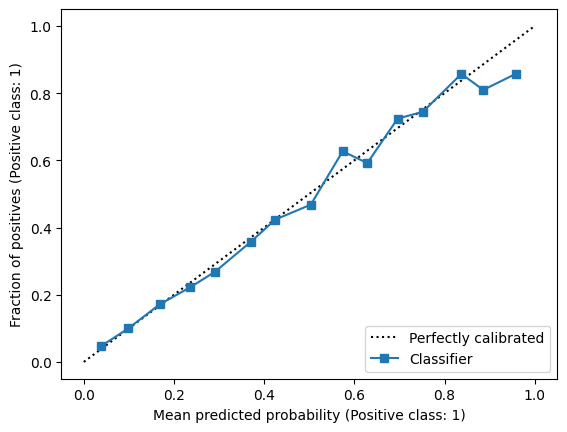

In [28]:
### Калибровка
### Your code is here

svm_isotonic_calibration = CalibratedClassifierCV(pipe_svm, cv=5, method='isotonic  ')
svm_isotonic_calibration.fit(X_train, y_train)
CalibrationDisplay.from_predictions(y_test, svm_isotonic_calibration.predict_proba(X_test)[:,1], n_bins=15)